In [1]:
import h5py
from glob import glob
import numpy as np
from datetime import datetime

import pandas as pd
import xarray as xr

from dask import array as da
from dask import delayed

from iwaves.utils import isw

import matplotlib.pyplot as plt
from tqdm import tqdm # progress bar



%matplotlib inline


In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.labelsize':'large'})

In [3]:
# Load the converted data
#ds = xr.open_dataset('../../kdv_solutions_azure/kdv_all_ensembles.nc')
#ds = xr.open_dataset('../output/kdv_all_ensembles_magnus.nc')
ds = xr.open_dataset('../output/kdv_magnus_x100km_v2.nc')


ds

<xarray.Dataset>
Dimensions:   (ensemble: 500, params: 6, time: 1471)
Coordinates:
  * time      (time) int64 0 1 2 3 4 5 6 ... 1464 1465 1466 1467 1468 1469 1470
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * params    (params) int64 0 1 2 3 4 5
Data variables:
    amax      (ensemble, time) float64 ...
    a0        (ensemble, time) float64 ...
    cn        (ensemble, time) float64 ...
    alpha     (ensemble, time) float64 ...
    beta      (time, ensemble, params) float64 ...
    ubed      (ensemble, time) float64 ...
    usurf     (ensemble, time) float64 ...

In [4]:
ds.amax.max(), ds.amax.min()

(<xarray.DataArray 'amax' ()>
 array(41.175163), <xarray.DataArray 'amax' ()>
 array(-98.734959))

In [5]:
amax_min = ds.amax.min(axis=0)
amax_max = ds.amax.max(axis=0)
amax_50 = np.mean(ds.amax, axis=0)


a0_min = ds.a0.min(axis=0)
a0_max = ds.a0.max(axis=0)
a0_50 = np.mean(ds.a0, axis=0)




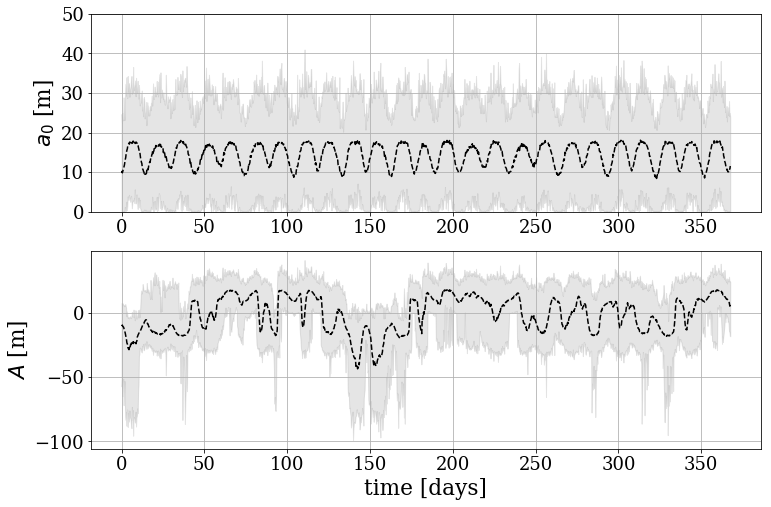

In [6]:
time = ds.time / 4

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.fill_between(time, a0_min, a0_max, color='0.5',alpha=0.2)
plt.plot(time,a0_50,'k--', lw=1.5)
#plt.xlim(200,300)
plt.ylabel('$a_0$ [m]')
plt.ylim(0,50)
#plt.xlabel('time [days]')
plt.grid(b=True)

plt.subplot(212)
plt.fill_between(time, amax_min, amax_max, color='0.5',alpha=0.2)
plt.plot(time,amax_50,'k--', lw=1.5)

#plt.xlim(200,300)
plt.ylabel('$A$ [m]')
plt.xlabel('time [days]')
plt.grid(b=True)

plt.savefig('../FIGURES/kdv_12month_a0_A.png',dpi=150)
plt.show()

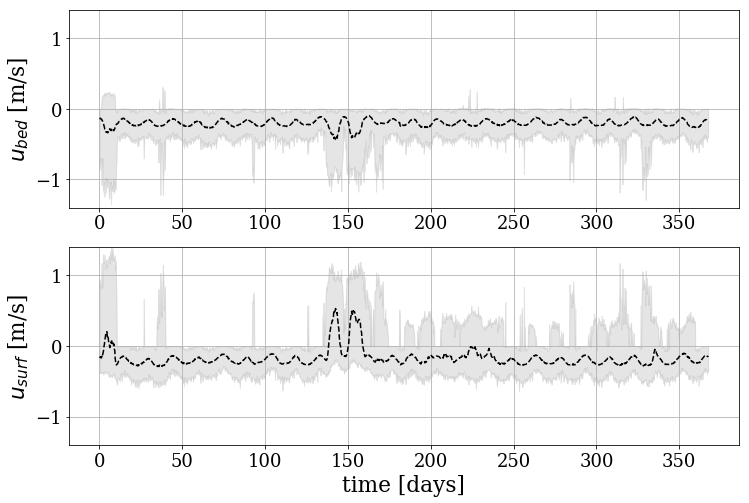

In [7]:

ubed_min = ds.ubed.min(axis=0)
ubed_max = ds.ubed.max(axis=0)
ubed_50 = np.mean(ds.ubed, axis=0)


usurf_min = ds.usurf.min(axis=0)
usurf_max = ds.usurf.max(axis=0)
usurf_50 = np.mean(ds.usurf, axis=0)

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.fill_between(time, ubed_min, ubed_max, color='0.5',alpha=0.2)
plt.plot(time,ubed_50,'k--', lw=1.5)
#plt.xlim(200,300)
plt.ylabel('$u_{bed}$ [m/s]')
plt.ylim(-1.4,1.4)
#plt.xlabel('time [days]')
plt.grid(b=True)

plt.subplot(212)
plt.fill_between(time, usurf_min, usurf_max, color='0.5',alpha=0.2)
plt.plot(time,usurf_50,'k--', lw=1.5)
#plt.xlim(200,300)
plt.ylabel('$u_{surf}$ [m/s]')
plt.ylim(-1.4,1.4)

plt.xlabel('time [days]')
plt.grid(b=True)

plt.savefig('../FIGURES/kdv_12month_velocity.png',dpi=150)
plt.show()

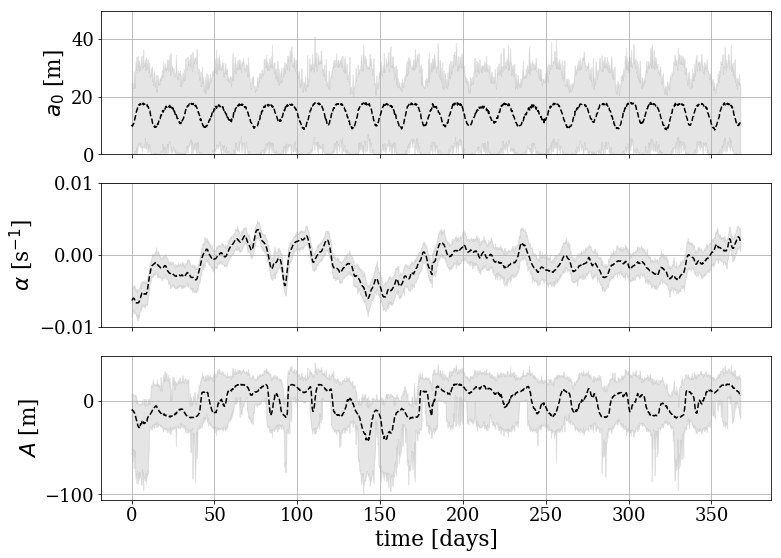

In [8]:
alpha_min = ds.alpha.min(axis=0)
alpha_max = ds.alpha.max(axis=0)
alpha_50 = np.median(ds.alpha, axis=0)


time = ds.time / 4

plt.figure(figsize=(12,9))
ax1=plt.subplot(311)
plt.fill_between(time, a0_min, a0_max, color='0.5',alpha=0.2)
plt.plot(time,a0_50,'k--', lw=1.5)
#plt.xlim(200,300)
plt.ylabel('$a_0$ [m]')
plt.ylim(0,50)
ax1.set_xticklabels([])

#plt.xlabel('time [days]')
plt.grid(b=True)

ax2=plt.subplot(312)
plt.fill_between(time, alpha_min, alpha_max, color='0.5',alpha=0.2)
plt.plot(time,alpha_50,'k--', lw=1.5)
#plt.xlim(200,300)
plt.ylabel(r'$\alpha$ [s$^{-1}$]')
plt.ylim(-0.01,0.01)
ax2.set_xticklabels([])
#plt.xlabel('time [days]')
plt.grid(b=True)

ax3=plt.subplot(313)
plt.fill_between(time, amax_min, amax_max, color='0.5',alpha=0.2)
plt.plot(time,amax_50,'k--', lw=1.5)

#plt.xlim(200,300)
plt.ylabel('$A$ [m]')
plt.xlabel('time [days]')
plt.grid(b=True)

plt.savefig('../FIGURES/kdv_12month_a0_A_alpha.png',dpi=150)

plt.show()

In [9]:
T = 12.42*3600.
omega = 2*np.pi / T
Ls = ds.cn**2. / (np.abs(ds.alpha)*ds.a0*omega) 
L = 0.75e5



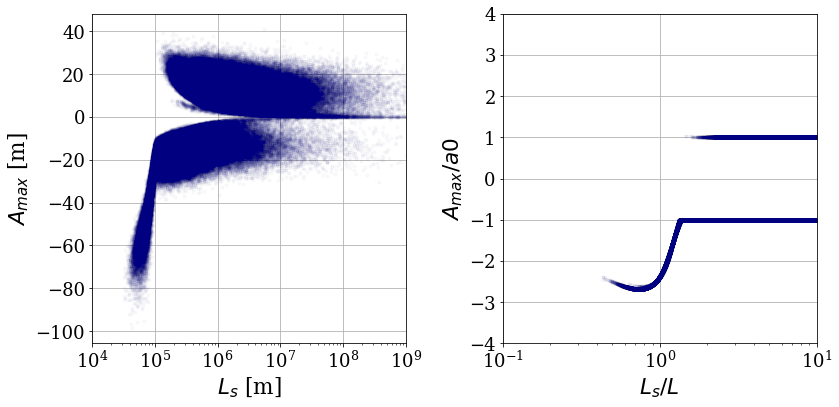

In [10]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.semilogx(Ls, ds.amax, '.', color='navy', alpha=0.02)
plt.xlim(1e4,1e9)
#plt.ylim(-4,4)
plt.grid(b=True)

plt.ylabel(r'$A_{max}$ [m]')
plt.xlabel('$L_s$ [m]')

plt.subplot(122)
plt.semilogx(Ls/L, ds.amax/ds.a0, '.', color='navy', alpha=0.02)
plt.xlim(1e-1,10)
plt.ylim(-4,4)
plt.grid(b=True)

plt.ylabel(r'$A_{max}/a0$')
plt.xlabel('$L_s / L$')


plt.tight_layout()

plt.savefig('../FIGURES/kdv_Amax_vs_Ls.png',dpi=150)


In [11]:
c_min = ds.cn.min(axis=0)
c_max = ds.cn.max(axis=0)
c_50 = np.median(ds.cn, axis=0)

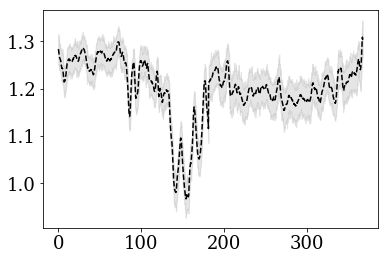

In [12]:
plt.fill_between(time, c_min, c_max, color='0.5',alpha=0.2)
plt.plot(time,c_50,'k--', lw=1.5)

In [13]:
1.5*86400*1.2

155520.0